# Project 3: Semi-Structure Data Analytics 
@ Saw Zwe Wai Yan 6318013


### 1. Import Libs

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Read Json File


In [100]:
# Specify the path to your JSON file
json_file_path = 'sales.json'

# Read the JSON data into a Pandas DataFrame
df = pd.read_json(json_file_path,lines=True)

# Display the DataFrame
df

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfeb'},{'$date': '2015-02-23T09:53:59.343Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store
1,{'$oid': '5bd761dcae323e45a93ccff2'},{'$date': '2015-07-25T07:20:29.804Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Seattle,"{'gender': 'F', 'age': 34, 'email': 'keigutip@...",False,Phone
2,{'$oid': '5bd761dcae323e45a93ccfee'},{'$date': '2014-11-11T02:13:51.893Z'},"[{'name': 'laptop', 'tags': ['electronics', 's...",London,"{'gender': 'F', 'age': 40, 'email': 'pan@cak.z...",False,In store
3,{'$oid': '5bd761dcae323e45a93ccffa'},{'$date': '2016-08-15T04:05:03.298Z'},"[{'name': 'laptop', 'tags': ['electronics', 's...",San Diego,"{'gender': 'F', 'age': 40, 'email': 'elusekjiv...",True,In store
4,{'$oid': '5bd761dcae323e45a93cd002'},{'$date': '2015-04-18T03:33:09.638Z'},"[{'name': 'laptop', 'tags': ['electronics', 's...",Austin,"{'gender': 'F', 'age': 37, 'email': 'oh@ocdumv...",False,Online
...,...,...,...,...,...,...,...
4995,{'$oid': '5bd761deae323e45a93ce311'},{'$date': '2013-09-27T01:38:17.324Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",London,"{'gender': 'F', 'age': 32, 'email': 'avcema@re...",False,In store
4996,{'$oid': '5bd761deae323e45a93ce326'},{'$date': '2013-11-03T18:07:08.503Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 36, 'email': 'ucouwibel...",False,In store
4997,{'$oid': '5bd761deae323e45a93ce346'},{'$date': '2017-10-17T09:33:12.67Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': 25, 'email': 'kopecatid...",False,Phone
4998,{'$oid': '5bd761deae323e45a93ce360'},{'$date': '2014-10-08T12:57:07.902Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 55, 'email': 'du@tieca....",False,Online


### 2.2 Read Types for Json Column

In [101]:
# Display column names and data types
for column, dtype in zip(df.columns, df.dtypes):
    print(f"Column: {column}, Data Type: {dtype}")


Column: _id, Data Type: object
Column: saleDate, Data Type: object
Column: items, Data Type: object
Column: storeLocation, Data Type: object
Column: customer, Data Type: object
Column: couponUsed, Data Type: bool
Column: purchaseMethod, Data Type: object


### 3. Queries

### 3.1 Show top 10 products (name) sales (quantity x price). 

#

In [102]:
# Define a function to calculate sales for each item
def calculate_sales(row):
    return int(row['quantity']) * float(row['price']['$numberDecimal'])

# Apply the calculate_sales function to the 'items' column to create a new column 'sales'
df['sales'] = df['items'].apply(lambda x: sum(calculate_sales(item) for item in x))

# Create a list to store item names and corresponding sales
item_sales = []

for _, row in df.iterrows():
    for item in row['items']:
        item_name = item['name']
        item_sale = calculate_sales(item)
        item_sales.append((item_name, item_sale))

# Create a DataFrame from the list
item_sales_df = pd.DataFrame(item_sales, columns=['Item Name', 'Sales'])

# Group by item name and sum the sales for each item
item_sales_summary = item_sales_df.groupby('Item Name')['Sales'].sum().reset_index()

# Sort the summary DataFrame by sales in descending order
item_sales_summary = item_sales_summary.sort_values(by='Sales', ascending=False)

top_10_products = item_sales_summary.head(10)

top_10_products


,Item Name,Sales
3,laptop,6775977.07
0,backpack,817374.10
5,pens,581843.27
1,binder,511644.57
4,notepad,463615.48
2,envelopes,376658.49
6,printer paper,367459.29


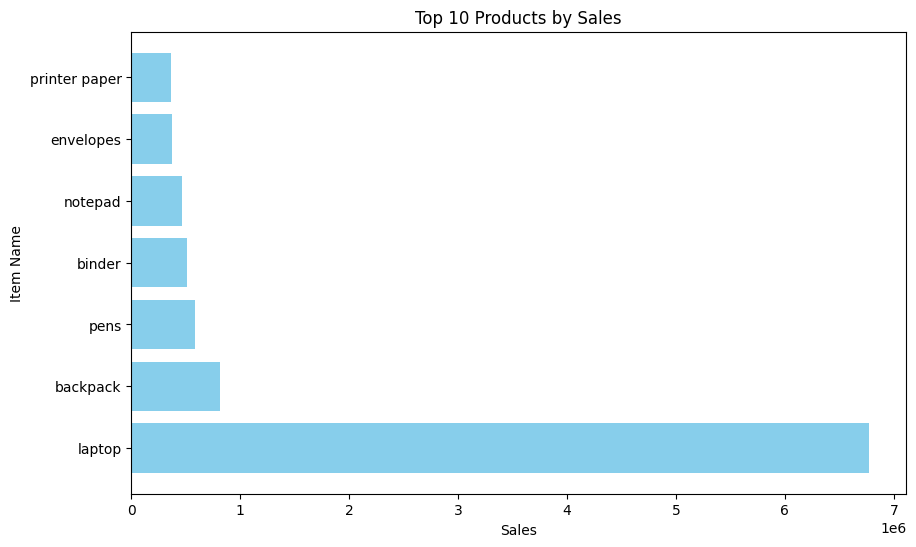

In [103]:
# Extract the data for plotting
item_names = top_10_products['Item Name']
sales = top_10_products['Sales']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(item_names, sales, color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Item Name')
plt.title('Top 10 Products by Sales')

plt.show()

### 3.2 Show top 3 products (name) sales by store (location). 

In [104]:
# Create a list to store product names, sales, and store locations
product_sales_location = []

for _, row in df.iterrows():
    for item in row['items']:
        item_name = item['name']
        item_sale = calculate_sales(item)
        location = row['storeLocation']
        product_sales_location.append((location, item_name, item_sale))

# Create a DataFrame from the list
product_sales_location_df = pd.DataFrame(product_sales_location, columns=['Store Location', 'Item Name', 'Sales'])

# Group by store location and item name, and sum the sales for each item at each location
product_sales_summary = product_sales_location_df.groupby(['Store Location', 'Item Name'])['Sales'].sum().reset_index()

# Sort the summary DataFrame by store location and sales in descending order
product_sales_summary = product_sales_summary.sort_values(by=['Store Location', 'Sales'], ascending=[True, False])

top_3_products_by_location = product_sales_summary.groupby('Store Location').head(3)

top_3_products_by_location


,Store Location,Item Name,Sales
3,Austin,laptop,1018494.05
0,Austin,backpack,115217.59
5,Austin,pens,74622.52
10,Denver,laptop,1961659.25
7,Denver,backpack,245679.34
12,Denver,pens,185008.39
17,London,laptop,1073098.72
14,London,backpack,144529.14
19,London,pens,92602.30
24,New York,laptop,694613.32


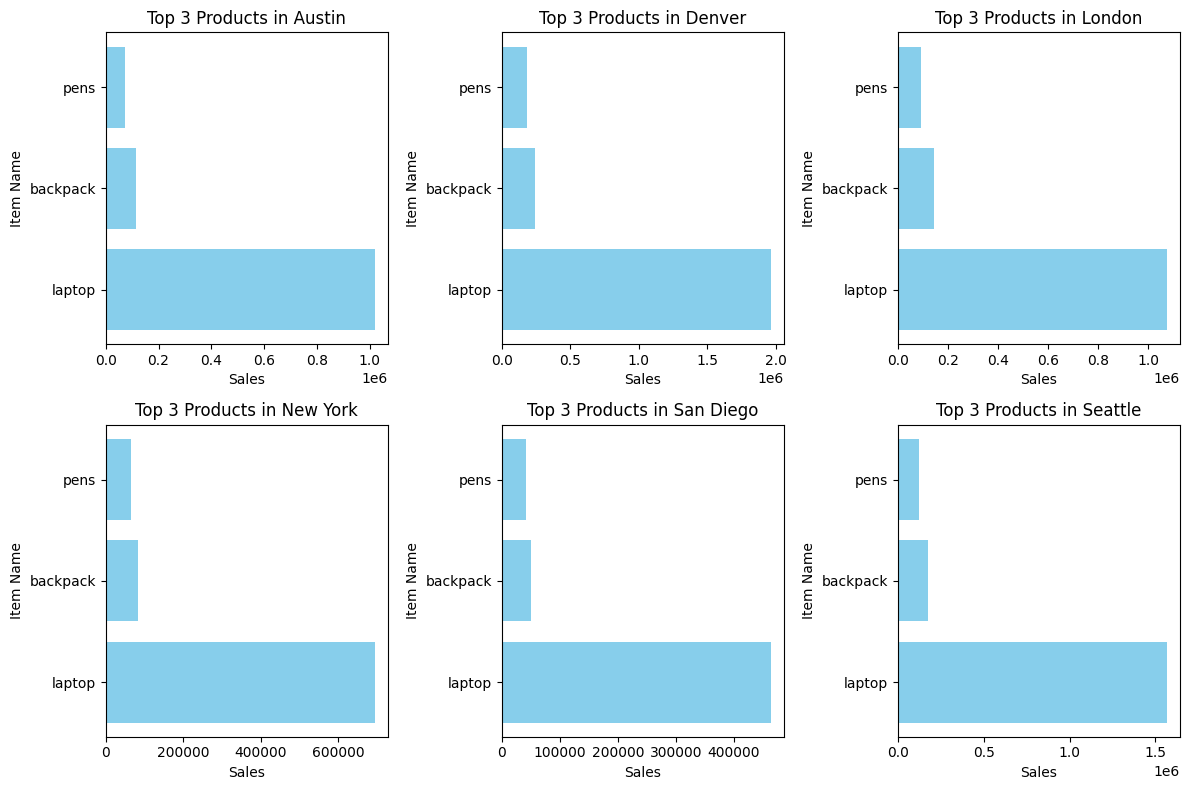

In [105]:
# Define a list of unique store locations
locations = top_3_products_by_location['Store Location'].unique()

# Set the number of products to display for each location
num_products_to_display = 3

# Determine the grid layout based on the number of locations
num_locations = len(locations)
num_rows = 2  # You can adjust the number of rows as needed
num_cols = (num_locations + num_rows - 1) // num_rows

# Create a flexible subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Iterate through each location and create bars for the top products
for i, location in enumerate(locations):
    row = i // num_cols
    col = i % num_cols
    
    location_data = top_3_products_by_location[top_3_products_by_location['Store Location'] == location]
    location_data = location_data.head(num_products_to_display)
    
    # Create a bar chart for the current location
    ax = axes[row, col]
    ax.barh(location_data['Item Name'], location_data['Sales'], color='skyblue')
    
    # Set axis labels and title
    ax.set_xlabel('Sales')
    ax.set_ylabel('Item Name')
    ax.set_title(f'Top {num_products_to_display} Products in {location}')

# Hide empty subplots
for i in range(num_locations, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Show the plot
plt.tight_layout()
plt.show()


### 3.3 Show rankings of each store (location). 

In [106]:
# Extract the 'satisfaction' attribute from the 'customer' column
df['satisfaction'] = df['customer'].apply(lambda x: x['satisfaction'])

# Create a DataFrame with 'storeLocation' and 'satisfaction' columns
location_satisfaction = df[['storeLocation', 'satisfaction']]

# Group the data by "storeLocation" and calculate the average satisfaction
location_avg_satisfaction = location_satisfaction.groupby('storeLocation')['satisfaction'].mean()

# Rank the locations based on average satisfaction in descending order
location_ranking = location_avg_satisfaction.sort_values(ascending=False)

location_ranking


storeLocation
New York     3.802395
London       3.802267
Denver       3.799871
Seattle      3.790123
San Diego    3.789017
Austin       3.767751
Name: satisfaction, dtype: float64

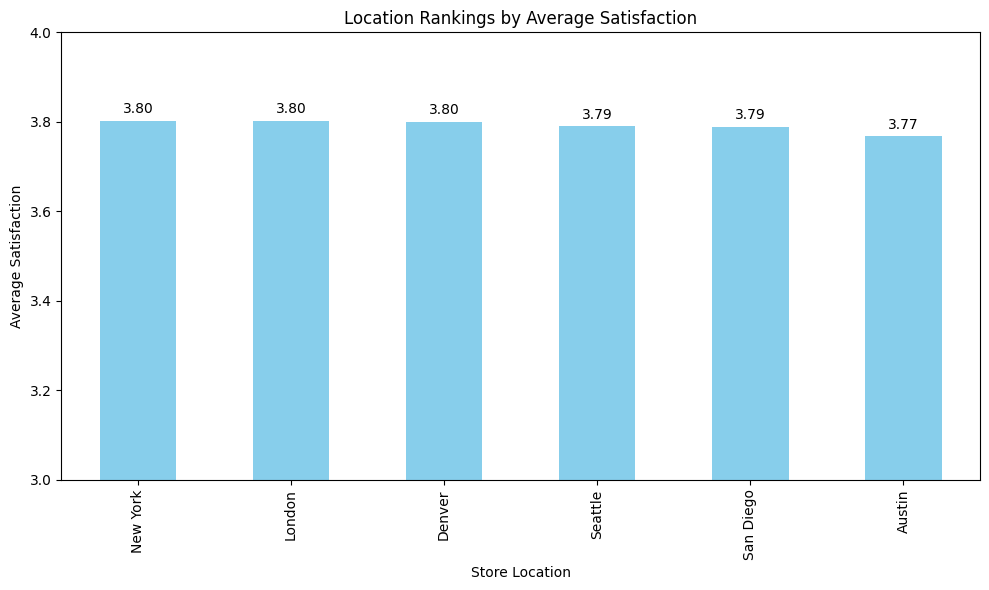

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the location rankings
location_ranking.plot(kind='bar', ax=ax, color='skyblue')

# Set y-axis limit to start from 3
ax.set_ylim(3, 4)

# Set axis labels and title
ax.set_xlabel('Store Location')
ax.set_ylabel('Average Satisfaction')
ax.set_title('Location Rankings by Average Satisfaction')

# Add labels to the bars
for i, v in enumerate(location_ranking):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### 3.3 Show purchased method by gender table 

In [108]:
# Extract the 'gender' attribute from the 'customer' column
df['gender'] = df['customer'].apply(lambda x: x['gender'])

# Create a cross-tabulation of purchase method by gender
purchase_by_gender = pd.crosstab(df['gender'], df['purchaseMethod'])

# Display the formatted purchase by gender table
purchase_by_gender


purchaseMethod,In store,Online,Phone
gender,,,
F,1430,813,284
M,1389,772,312


In [109]:
# Remove 'Phone' column
purchase_by_gender = purchase_by_gender.drop('Phone', axis=1)

# Display the formatted purchase by gender table
purchase_by_gender


purchaseMethod,In store,Online
gender,,
F,1430,813
M,1389,772


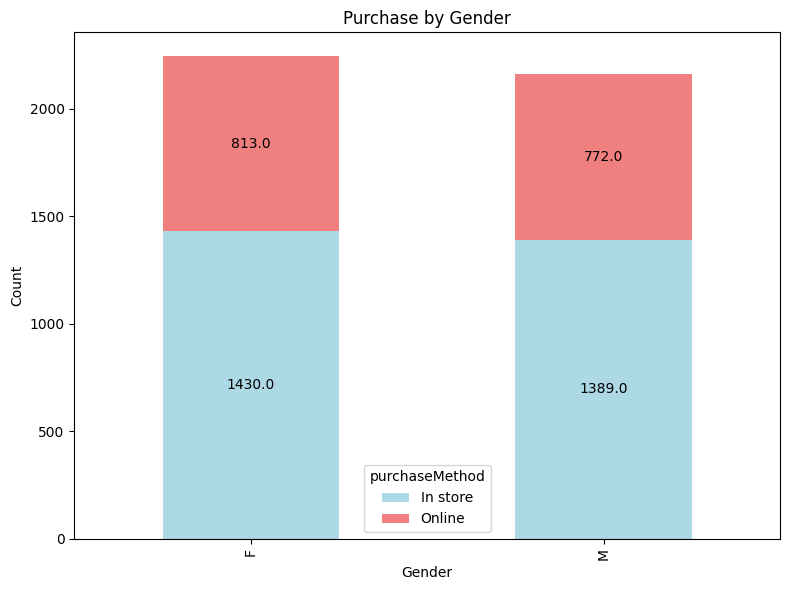

In [110]:
colors = ['lightblue', 'lightcoral']

# Create a stacked bar plot
ax = purchase_by_gender.plot(kind='bar', color=colors, figsize=(8, 6), stacked=True)

# Set axis labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Purchase by Gender')

# Add numbers on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### 3.5 Show monthly total sales 

In [111]:
# Extract the "$date" values from the "saleDate" dictionaries and convert them to datetime
df['saleDate'] = pd.to_datetime(df['saleDate'].apply(lambda x: x["$date"]))

# Extract the year and month into separate columns
df['Year'] = df['saleDate'].dt.year
df['Month'] = df['saleDate'].dt.month

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replace month numbers with month names
df['Month'] = df['Month'].map(month_names)
df['Month'] = pd.Categorical(df['Month'], categories=month_names.values(), ordered=True)

# Group the data by year and month and calculate the total sales
monthly_sales = df.groupby(['Year', 'Month'])['sales'].sum()

# Display the monthly total sales
print(monthly_sales)


Year  Month    
2013  January      196043.76
      February     147622.59
      March        140700.06
      April        162336.67
      May          179143.37
      June         142132.02
      July         176298.23
      August       130977.22
      September    137871.99
      October      173126.73
      November     148358.38
      December     174306.96
2014  January      125824.02
      February     141174.41
      March        193413.50
      April        132593.08
      May          166896.80
      June         143304.56
      July         184804.60
      August       167979.81
      September    159802.92
      October      149284.84
      November     180564.85
      December     139466.83
2015  January      222577.01
      February     189776.15
      March        178086.94
      April        132298.50
      May          167482.69
      June         149484.34
      July         149510.47
      August       154868.63
      September    135615.80
      October      175215.3

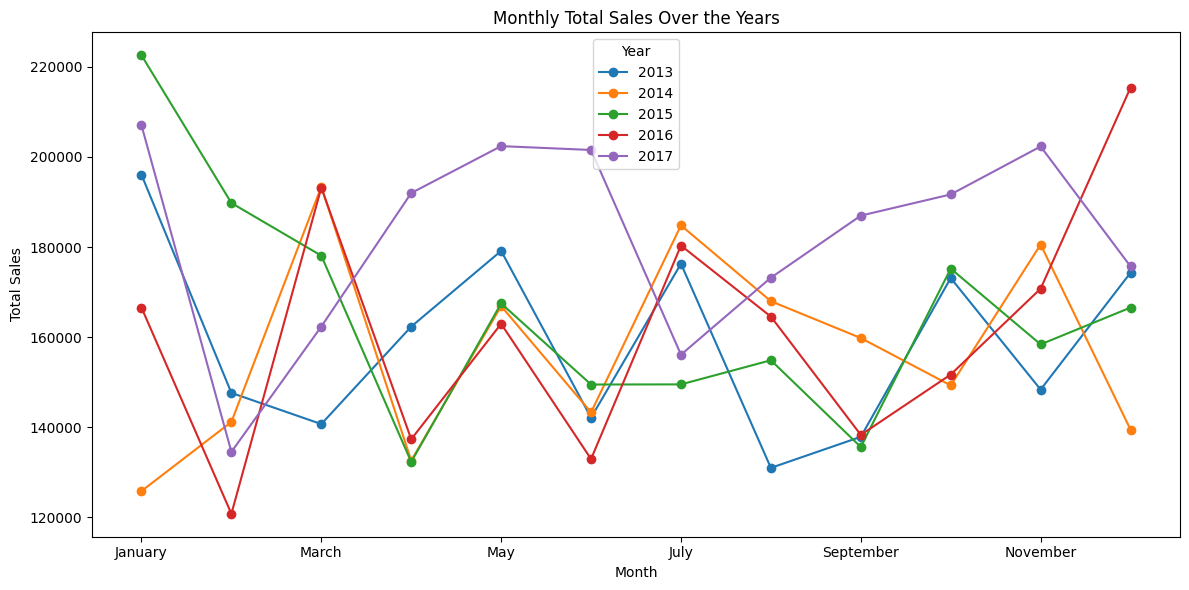

In [112]:
# Create a pivot table to arrange the data for plotting
pivot_monthly_sales = monthly_sales.reset_index().pivot(index='Month', columns='Year', values='sales')

# Plot the monthly total sales as a line graph
ax = pivot_monthly_sales.plot(kind='line', marker='o', figsize=(12, 6))

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Over the Years')

# Add a legend
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()